In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target distribution:
species
0          50
1          50
2          50
Name: count, dtype: int64


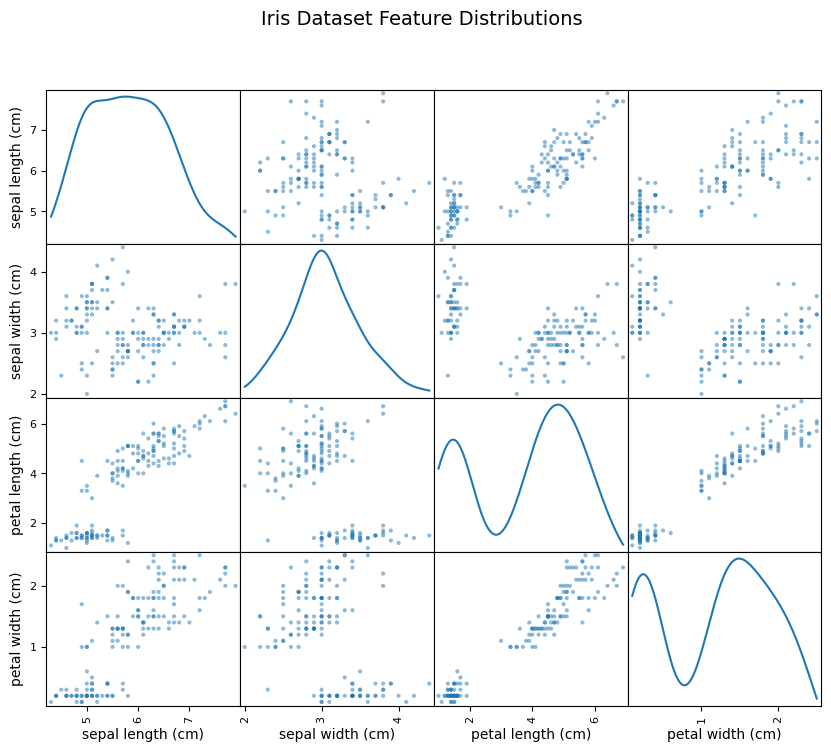

In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["species"])

print("First 5 rows of dataset:")
print(X.head())

print("\nTarget distribution:")
print(y.value_counts())

# Visualize features
pd.plotting.scatter_matrix(X, figsize=(10, 8), diagonal='kde')
plt.suptitle("Iris Dataset Feature Distributions", fontsize=14)
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    eps = 1e-9
    return -np.sum(y_true * np.log(y_pred + eps)) / m

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [ ]:
class SimpleDNN:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01):
        np.random.seed(42)
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.lr = lr

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def backward(self, X, y, output):
        m = X.shape[0]

        # Output layer gradients
        dZ2 = output - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # Hidden layer gradients
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * sigmoid_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Gradient descent update
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=1000):
        history = {"loss": [], "accuracy": []}
        for i in range(epochs):
            output = self.forward(X)
            loss = cross_entropy(y, output)
            acc = accuracy(y, output)
            self.backward(X, y, output)

            history["loss"].append(loss)
            history["accuracy"].append(acc)

            if i % 100 == 0:
                print(f"Epoch {i}: Loss={loss:.4f}, Accuracy={acc:.4f}")

        return history

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

In [ ]:
dnn = SimpleDNN(input_size=4, hidden_size=8, output_size=3, lr=0.1)
history = dnn.train(X_train, y_train, epochs=1000)

Epoch 0: Loss=1.0987, Accuracy=0.3333
Epoch 100: Loss=1.0948, Accuracy=0.8000
Epoch 200: Loss=0.8991, Accuracy=0.7250
Epoch 300: Loss=0.5464, Accuracy=0.8833
Epoch 400: Loss=0.4240, Accuracy=0.9167
Epoch 500: Loss=0.3531, Accuracy=0.9167
Epoch 600: Loss=0.3018, Accuracy=0.9250
Epoch 700: Loss=0.2621, Accuracy=0.9417
Epoch 800: Loss=0.2300, Accuracy=0.9500
Epoch 900: Loss=0.2032, Accuracy=0.9583


In [ ]:
y_pred = dnn.forward(X_test)
test_loss = cross_entropy(y_test, y_pred)
test_acc = accuracy(y_test, y_pred)

print(f"\nFinal Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")


Final Test Loss: 0.2169
Final Test Accuracy: 0.9667


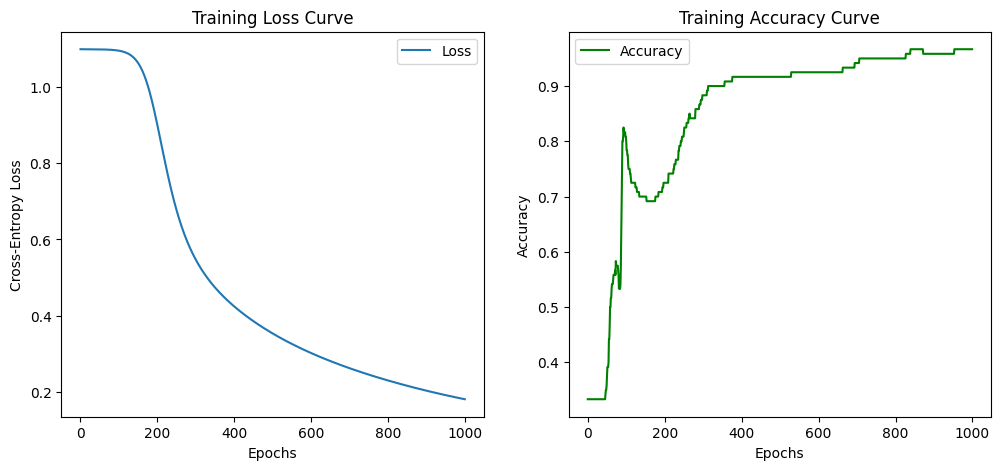

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history["loss"], label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training Loss Curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history["accuracy"], label="Accuracy", color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Curve")
plt.legend()

plt.show()